In [1]:
import torch
import numpy as np

In [2]:
def synthetic_data(w,b,num):
    X = torch.normal(0,1,(num,len(w)))
    Y = torch.matmul(X,w)+b
    Y = torch.tanh(Y)
    Y += torch.normal(0,0.01,Y.shape)
    return X,Y.reshape([-1,1])

true_w = torch.tensor([3.2,2.5])
true_b = 3.2

features, labels = synthetic_data(true_w,true_b,100)

In [3]:
import matplotlib.pyplot as plt

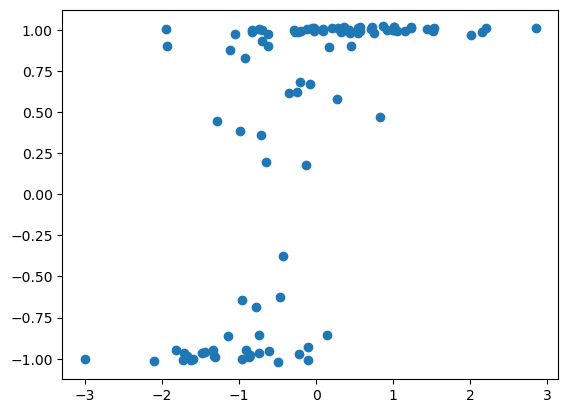

In [4]:
with torch.no_grad():
    plt.scatter(features[:,0].reshape(labels.shape),labels)

In [5]:
from torch.utils.data import DataLoader,TensorDataset
def load_array(data_arrays,batch_size,is_train=True):
    dataset = TensorDataset(*data_arrays)
    return DataLoader(dataset,batch_size,shuffle=is_train)

In [6]:
def train(net,optimizer,loss,data_iter,epochs):
    loss_table = []
    test_loss_table = []
    for epoch in range(epochs):
        for X,y in data_iter:
            l = loss(net(X),y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        with torch.no_grad():
            current_loss = loss(net(X),y)
            loss_table.append(current_loss.mean().detach())
            #print(current_loss.mean())

            new_features = torch.normal(0,1,[100,2])
            predict = net(new_features)
            true_Y = torch.matmul(new_features,true_w)+true_b
            true_Y = torch.tanh(true_Y)
            true_Y += torch.normal(0,0.01,true_Y.shape)
            test_loss_table.append(loss(predict.reshape(true_Y.shape),true_Y).mean().detach())

    return loss_table,test_loss_table

In [7]:
data_iter = load_array((features,labels),10)

In [8]:
net = torch.nn.Sequential(torch.nn.Linear(features.shape[1],4),
                          torch.nn.ReLU(),
                          torch.nn.Linear(4,2),
                          torch.nn.ReLU(),
                          torch.nn.Linear(2,labels.shape[1]))

In [9]:
torch.nn.init.xavier_normal_(net[0].weight)
torch.nn.init.xavier_normal_(net[2].weight)
net[0].bias.data.fill_(0)
net[2].bias.data.fill_(0)
print(net[0].weight.data)

tensor([[-0.1413,  0.5821],
        [-0.7501,  0.2675],
        [ 0.0804,  0.8383],
        [ 0.4105, -0.2251]])


In [10]:
optimizer = torch.optim.SGD(net.parameters(),0.003)
loss = torch.nn.MSELoss()

In [11]:
epochs = 150
loss_table,test_loss_table = train(net,optimizer,loss,data_iter,epochs)

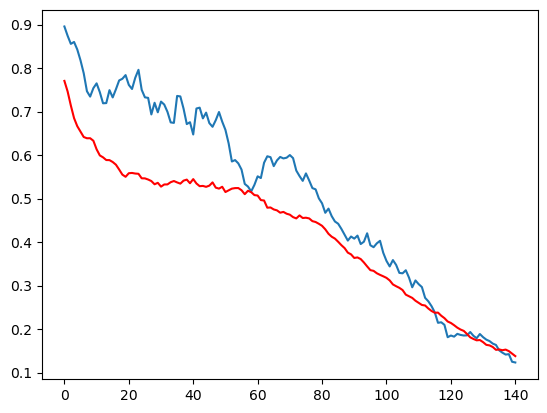

In [12]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
loss_table = moving_average(loss_table,10)
test_loss_table = moving_average(test_loss_table,10)
epoches = list(range(len(loss_table)))
plt.plot(epoches,loss_table)
plt.plot(epoches,test_loss_table,c='r')

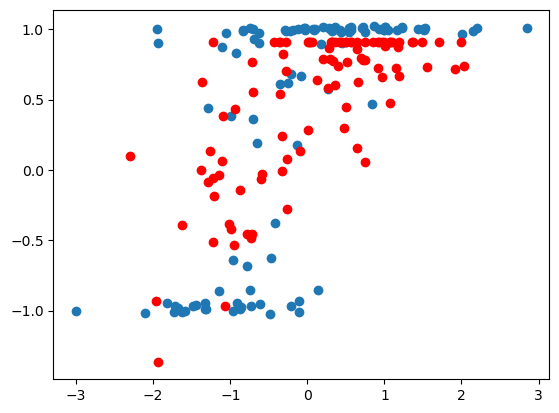

In [13]:
new_features = torch.normal(0,1,[100,2])
predict = net(new_features)
plt.scatter(features[:,0].reshape(labels.shape),labels)
plt.scatter(new_features[:,0].reshape(labels.shape),predict.detach(),c='red')

In [14]:
true_Y = torch.matmul(new_features,true_w)+true_b
true_Y = torch.tanh(true_Y)
true_Y += torch.normal(0,0.01,true_Y.shape)

print(loss(net(new_features).reshape(true_Y.shape),true_Y).mean().detach())

tensor(0.0784)


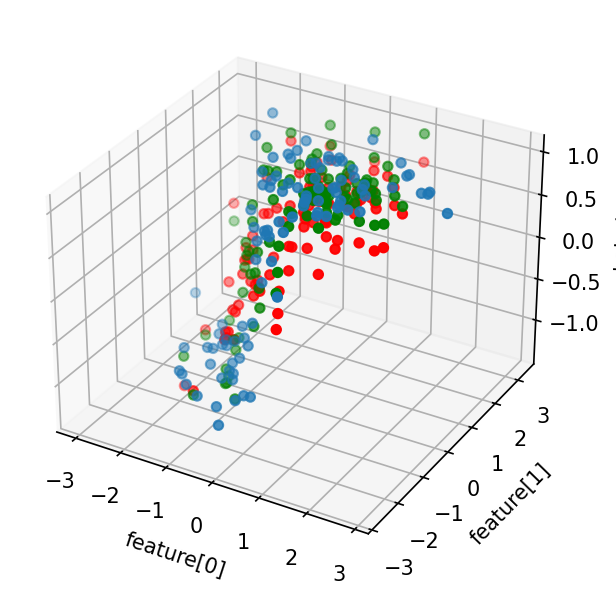

In [15]:
from mpl_toolkits.mplot3d import Axes3D
# 创建一个新的图形
fig = plt.figure()

# 添加一个3D子图
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
ax.scatter(features[:,0].reshape(labels.shape), features[:,1].reshape(labels.shape), labels)
ax.scatter(new_features[:,0].reshape(labels.shape),new_features[:,1].reshape(labels.shape),predict.detach(),c='red')
ax.scatter(new_features[:,0].reshape(labels.shape),new_features[:,1].reshape(labels.shape),true_Y.detach(),c='green')

# 设置坐标轴标签
ax.set_xlabel('feature[0]')
ax.set_ylabel('feature[1]')
ax.set_zlabel('Label')

fig.set_dpi(150)
# 显示图形
plt.show()
